In [25]:
import pandas as pd

In [26]:
df= pd.read_csv(r"C:\Users\ishik\Downloads\Stores.csv")

In [27]:
df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [28]:
df.columns

Index(['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')

In [29]:
df.shape

(896, 5)

In [31]:
df['Store_Sales'].idxmax()

649

In [32]:
df.iloc[648]

Store ID                  649
Store_Area               1514
Items_Available          1794
Daily_Customer_Count     1400
Store_Sales             54820
Name: 648, dtype: int64

In [33]:
df['Store_Sales'].idxmin()

31

In [34]:
df.iloc[30]

Store ID                   31
Store_Area               1439
Items_Available          1746
Daily_Customer_Count      990
Store_Sales             80140
Name: 30, dtype: int64

In [35]:
df= df.drop(columns='Store ID ')

In [36]:
df.head()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1659,1961,530,66490
1,1461,1752,210,39820
2,1340,1609,720,54010
3,1451,1748,620,53730
4,1770,2111,450,46620


In [37]:
df.duplicated().sum()

0

In [38]:
df.isna().sum()

Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store_Area            896 non-null    int64
 1   Items_Available       896 non-null    int64
 2   Daily_Customer_Count  896 non-null    int64
 3   Store_Sales           896 non-null    int64
dtypes: int64(4)
memory usage: 28.1 KB


In [40]:
df.describe()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000
mean,1485.409598,1782.035714,786.350446,59351.305804
std,250.237011,299.872053,265.389281,17190.741895
min,775.000000,932.000000,10.000000,14920.000000
25%,1316.750000,1575.500000,600.000000,46530.000000
50%,1477.000000,1773.500000,780.000000,58605.000000
75%,1653.500000,1982.750000,970.000000,71872.500000
max,2229.000000,2667.000000,1560.000000,116320.000000


In [41]:
df.corr()['Store_Sales'].sort_values()

Daily_Customer_Count    0.008629
Store_Area              0.097474
Items_Available         0.098849
Store_Sales             1.000000
Name: Store_Sales, dtype: float64

In [42]:
df.sort_values(by= 'Store_Sales')

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
31,1250,1508,990,14920
852,1477,1790,880,16370
775,1537,1877,660,17670
593,1624,1946,870,20270
352,1397,1686,850,21300
...,...,...,...,...
758,1486,1758,820,101820
408,1303,1587,1310,102310
432,1365,1638,680,102920
868,1775,2104,980,105150


In [48]:
#time series analysis
data= pd.read_csv(r"C:\Users\ishik\Downloads\Course+DataSet.csv",index_col='DATE',parse_dates=True)

In [49]:
data.head()

,Price
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [50]:
data.tail()

,Price
DATE,
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359
2017-12-01,114.7212
2018-01-01,129.4048


In [51]:
data.shape

(397, 1)

<AxesSubplot:xlabel='DATE'>

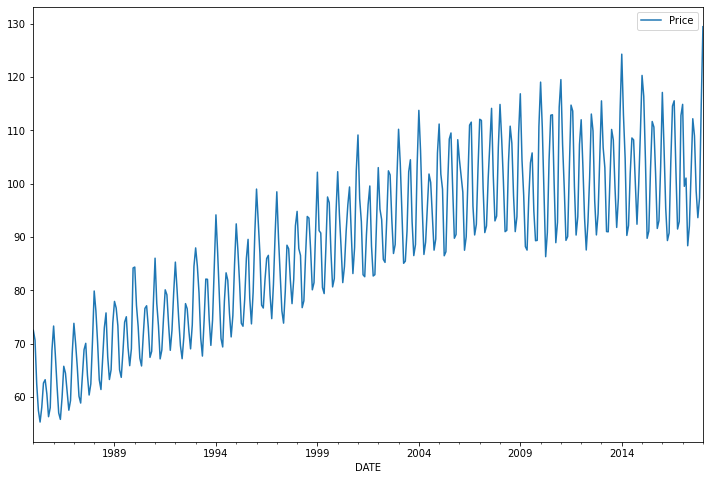

In [52]:
data.plot(figsize=(12,8))

In [53]:
start='01-01-2000'
end='01-01-2005'
timelim=(data.index>=start)&(data.index<end)
datanew=data.loc[timelim]

In [54]:
datanew.head()

,Price
DATE,
2000-01-01,102.2301
2000-02-01,94.2989
2000-03-01,88.0927
2000-04-01,81.4425
2000-05-01,84.4552


<AxesSubplot:xlabel='DATE'>

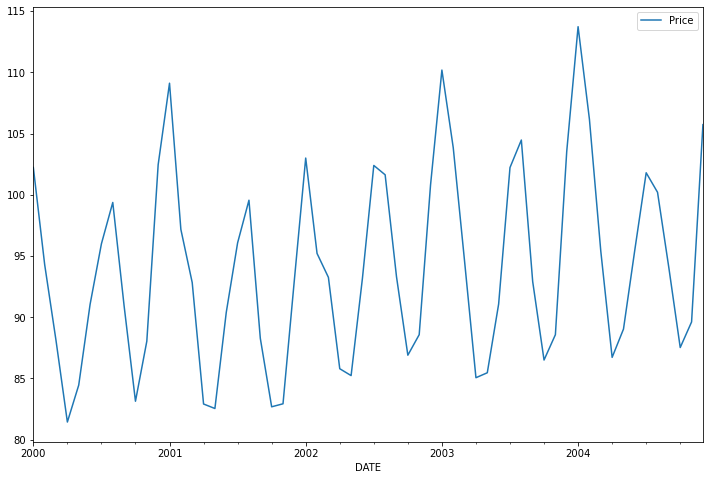

In [56]:
datanew.plot(figsize=(12,8))

In [57]:
dataquarterly=data.rolling(window=3).mean()

<AxesSubplot:xlabel='DATE'>

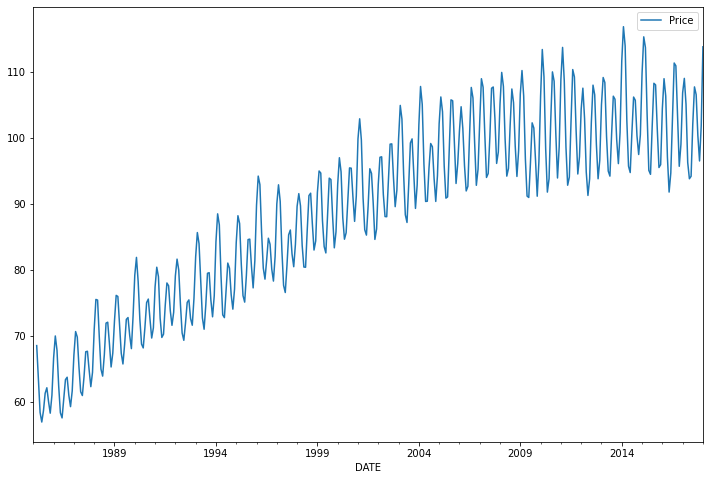

In [58]:
dataquarterly.plot(figsize=(12,8))

<AxesSubplot:xlabel='DATE'>

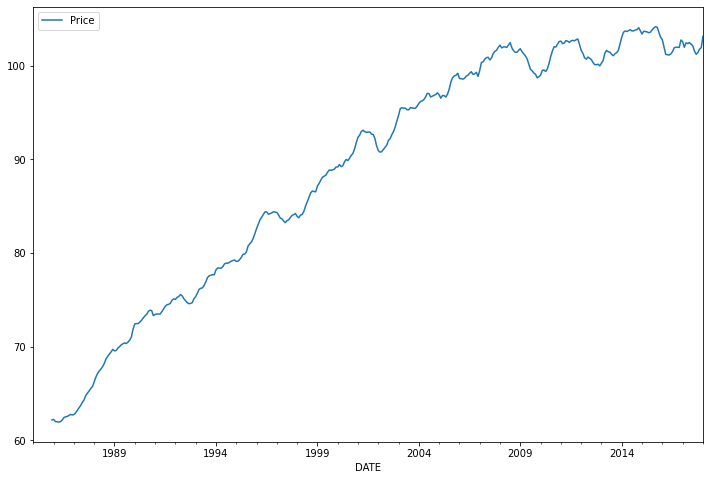

In [60]:
datayearly=data.rolling(window=12).mean()
datayearly.plot(figsize=(12,8))

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

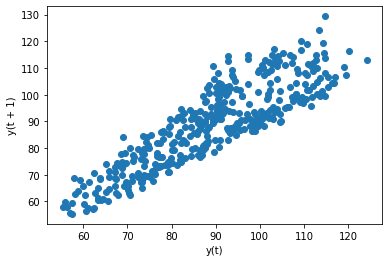

In [61]:
from pandas.plotting import lag_plot
lag_plot(data['Price'])

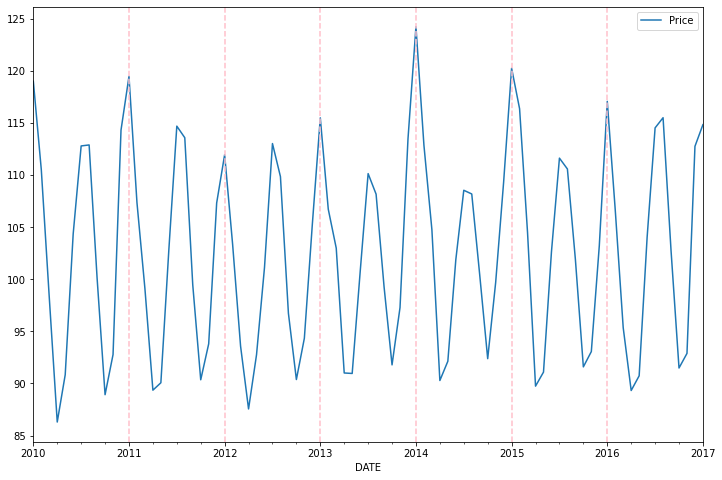

In [65]:
#if data seasonal
import matplotlib.pyplot as plt
start='01-01-2010'
end='01-01-2017'
timelim=(data.index>=start) & (data.index<=end)
datatimeline=data.loc[timelim]
datatimeline.plot(figsize=(12,8))

xcoords=['01-01-2011','01-01-2012','01-01-2013','01-01-2014','01-01-2015','01-01-2016']
for xc in xcoords:
    plt.axvline(x=xc,color='pink', linestyle='--')

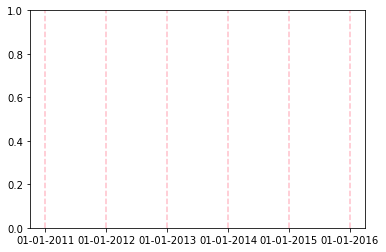

In [64]:
xcoords=['01-01-2011','01-01-2012','01-01-2013','01-01-2014','01-01-2015','01-01-2016']
for xc in xcoords:
    plt.axvline(x=xc,color='pink', linestyle='--')

In [66]:
#dickey-fuller test for stationarity 
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
    result =adfuller(series,autolag='AIC')
    labels=['ADF test statistic', 'p-value','#lags used','#observations']
    out= pd.Series(result[0:4],index=labels)
    print(out.to_string())
    if result[1]<=0.05:
        print('Reject the null hypothesis. Data has no unit root and stationary')
    else:
        print('Fail to reject the null hypothesis. Data has unit root and non-stationary')
            

In [67]:
adf_test(data['Price'])

ADF test statistic     -2.256990
p-value                 0.186215
#lags used             15.000000
#observations         381.000000
Fail to reject the null hypothesis. Data has unit root and non-stationary


In [68]:
#autocorrelation
autocorr_lag1=data['Price'].autocorr(lag=1)
print('One month lag', autocorr_lag1)

One month lag 0.8717308657532122


In [69]:
autocorr_lag3=data['Price'].autocorr(lag=3)
print('Three month lag', autocorr_lag3)

Three month lag 0.5355867575850725


In [70]:
autocorr_lag6=data['Price'].autocorr(lag=6)
print('Six month lag', autocorr_lag6)

Six month lag 0.9266842332406334


In [71]:
autocorr_lag9=data['Price'].autocorr(lag=9)
print('Nine month lag', autocorr_lag9)

Nine month lag 0.5180088174990668


In [72]:
#decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decompose=seasonal_decompose(data['Price'],model='additive')

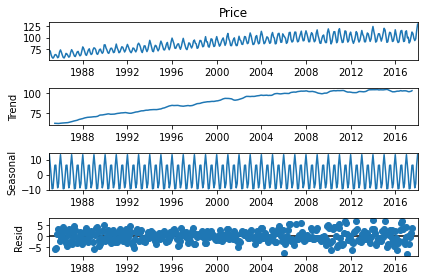

In [73]:
decompose.plot()
plt.show()

In [74]:
#numpy
import numpy as np

In [75]:
array=np.array(10)
print(array)

10


In [76]:
type(array)

numpy.ndarray

In [77]:
zerodimension=np.array(10)
print(zerodimension)

10


In [78]:
print(zerodimension.ndim)

0


In [79]:
onedimension=np.array([5,15,25,35])
print(onedimension)

[ 5 15 25 35]


In [80]:
print(onedimension.ndim)

1


In [82]:
twodimension=np.array([[5,15,45],[64,22,33]])
print(twodimension)

[[ 5 15 45]
 [64 22 33]]


In [83]:
print(twodimension.ndim)

2


In [89]:
#tensor-more than 2 dimensions
tensor=np.array([[[15,24,35],[23,56,25]],[[45,63,14],[34,43,56]]])
print(tensor)

[[[15 24 35]
  [23 56 25]]

 [[45 63 14]
  [34 43 56]]]


In [90]:
print(tensor.ndim)

3


In [91]:
print(onedimension[1])

15


In [92]:
twodimension[1,2]

33

In [96]:
#array slicing
onedimension[1:3]


array([15, 25])

In [97]:
onedimension[1:4]

array([15, 25, 35])

In [98]:
twodimension[1,1:]

array([22, 33])

In [100]:
for element in onedimension:
    print (element)

5
15
25
35


In [102]:
for ele in twodimension:
    print(ele*5)

[ 25  75 225]
[320 110 165]


In [ ]:
#matplotlib